In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

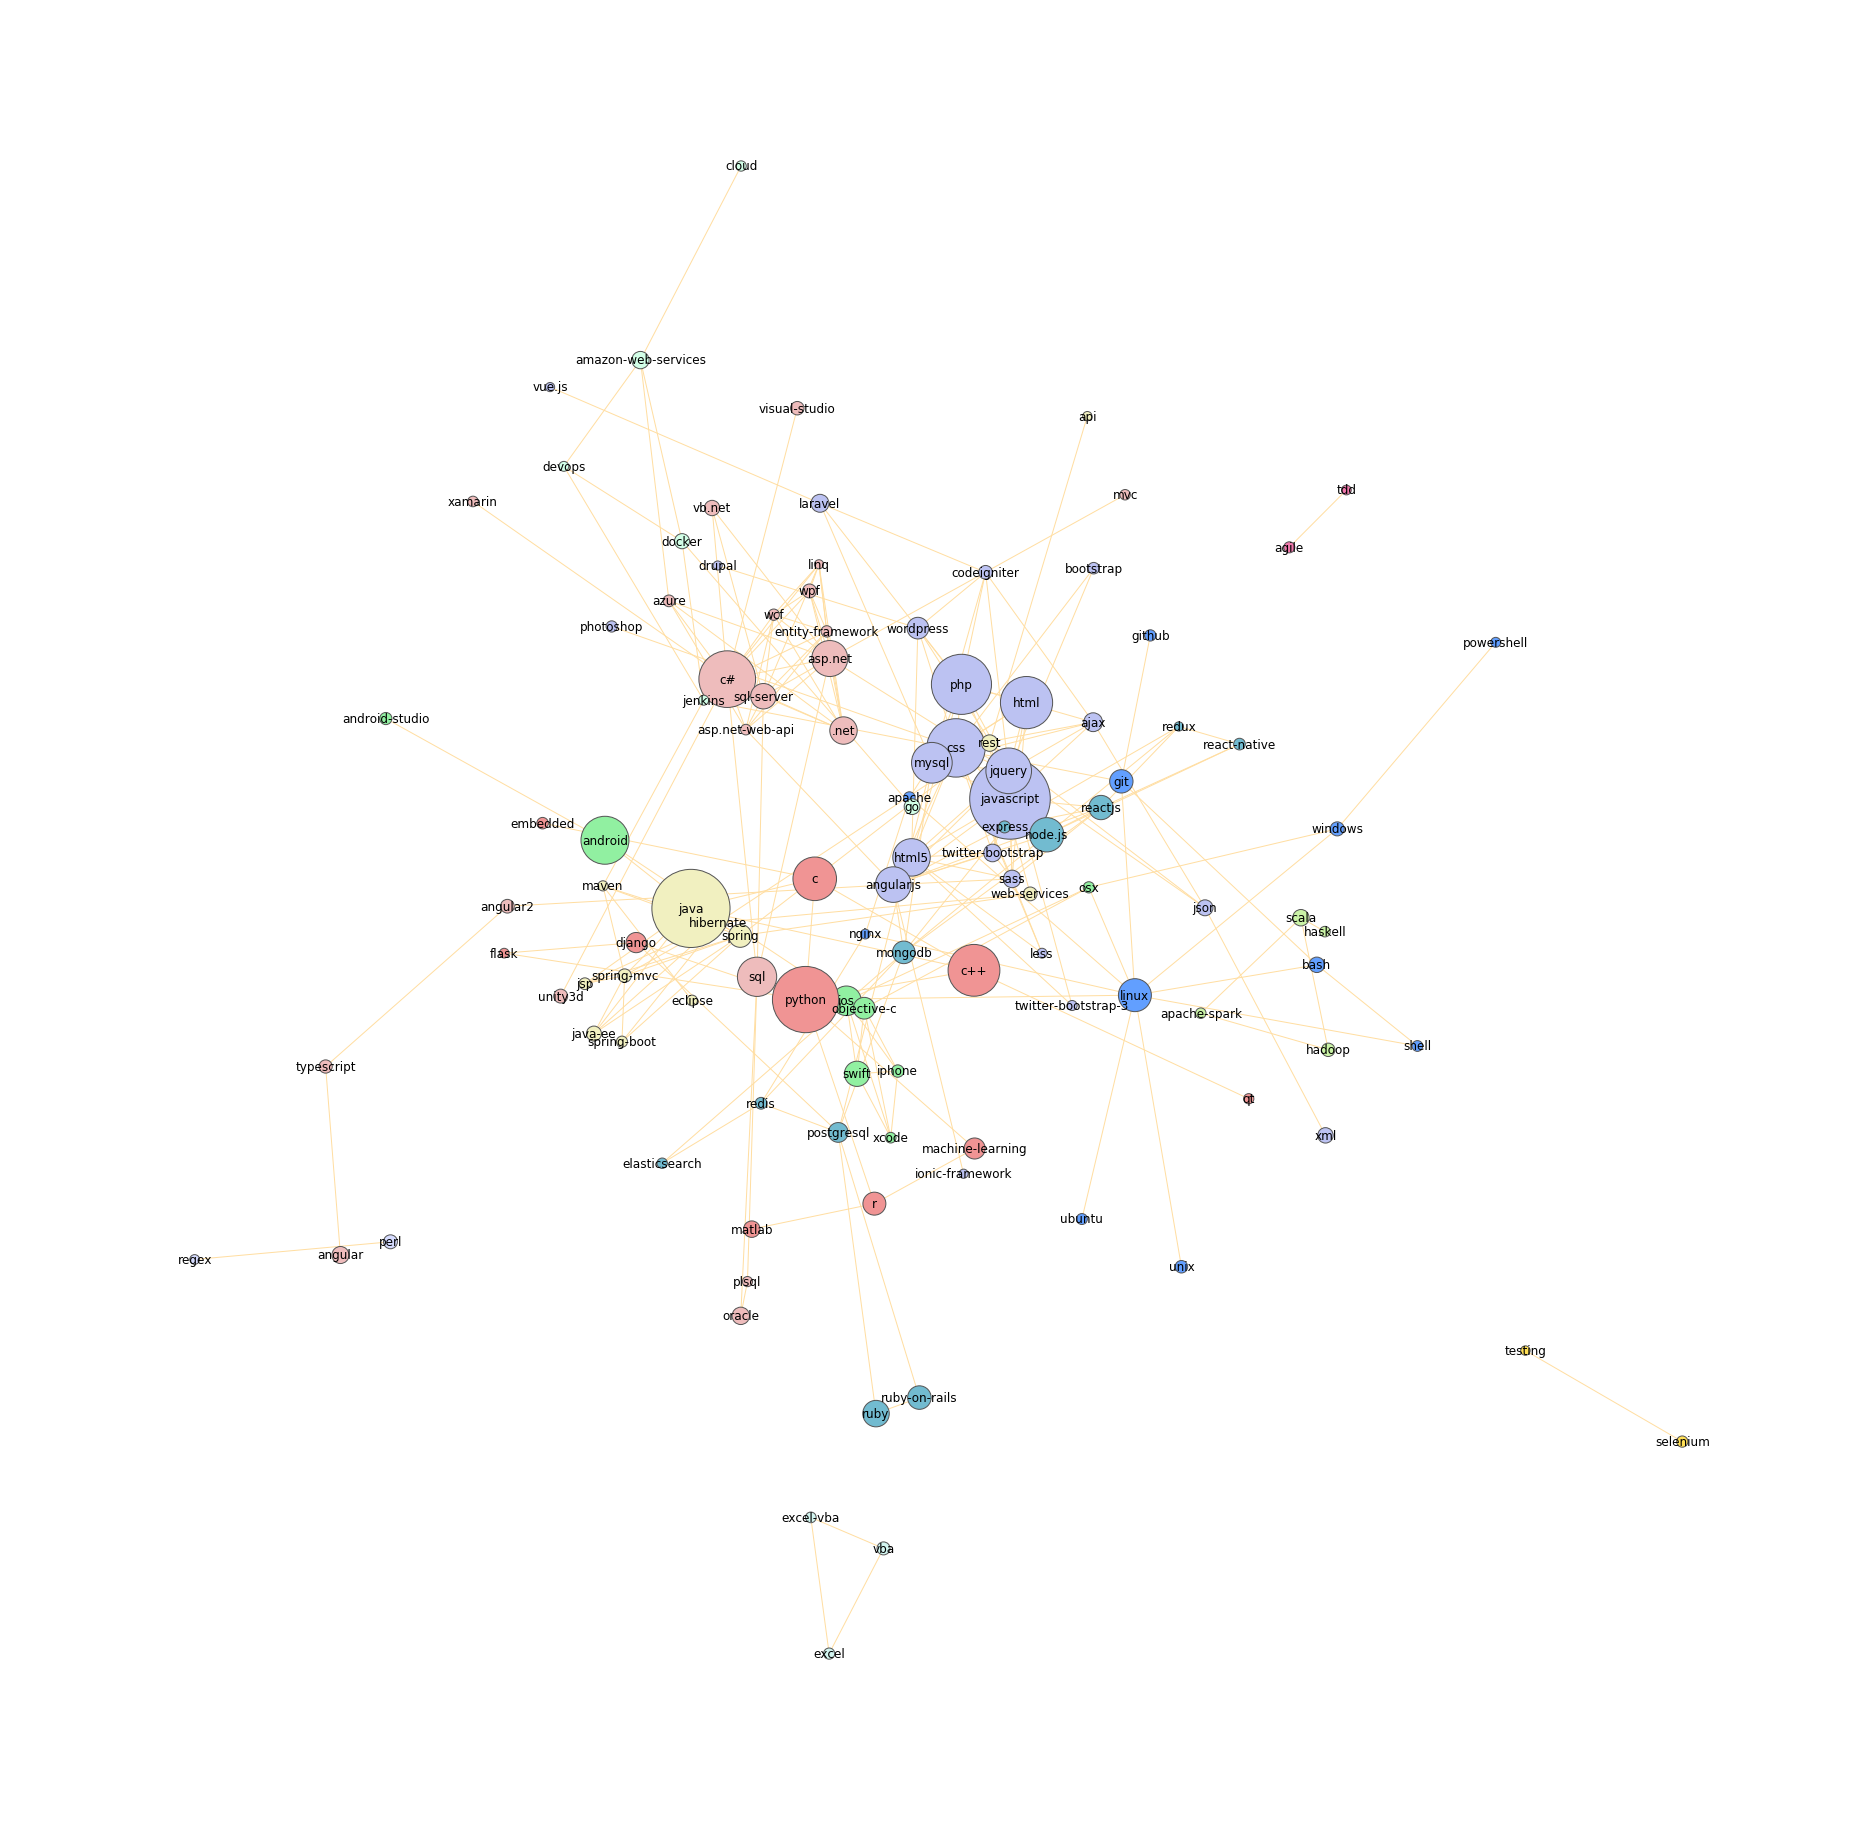

In [31]:
import warnings
warnings.filterwarnings('ignore')

G = nx.Graph(day="Stackoverflow")
df_nodes = pd.read_csv('../input/stack-overflow-tag-network/stack_network_nodes.csv')
df_edges = pd.read_csv('../input/stack-overflow-tag-network/stack_network_links.csv')

for index, row in df_nodes.iterrows():
    G.add_node(row['name'], group=row['group'], nodesize=row['nodesize'])
    
for index, row in df_edges.iterrows():
    G.add_weighted_edges_from([(row['source'], row['target'], row['value'])])
    
color_map = {1:'#f09494', 2:'#eebcbc', 3:'#72bbd0', 4:'#91f0a1', 5:'#629fff', 6:'#bcc2f2',  
             7:'#eebcbc', 8:'#f1f0c0', 9:'#d2ffe7', 10:'#caf3a6', 11:'#ffdf55', 12:'#ef77aa', 
             13:'#d6dcff', 14:'#d2f5f0'} 

plt.figure(figsize=(25,25))
options = {
    'edge_color': '#FFDEA2',
    'width': 1,
    'with_labels': True,
    'font_weight': 'regular',
}
colors = [color_map[G.node[node]['group']] for node in G]
sizes = [G.node[node]['nodesize']*10 for node in G]

"""
Using the spring layout : 
- k controls the distance between the nodes and varies between 0 and 1
- iterations is the number of times simulated annealing is run
default k=0.1 and iterations=50
"""
nx.draw(G, node_color=colors, node_size=sizes, pos=nx.spring_layout(G, k=0.25, iterations=10), **options)
ax = plt.gca()
ax.collections[0].set_edgecolor("#555555") 
plt.show()